In [11]:
library(tidyr)
library(corrplot)
library(RColorBrewer)
library(plyr)
library(fdrtool)

# Calculates the collinearity between the different QC measures

## ABIDE sMRI

### Load and tidy the data

In [5]:
abide_anat_spat_df<-read.csv("2016_05_ABIDE_qap_anatomical_spatial.csv")

id.vars=c('Participant','Site','Session','Series')
measure.vars=c('CNR','Cortical.Contrast','EFC','FBER','FWHM','Qi1','SNR')
abide_anat_spat_df<-abide_anat_spat_df[c(id.vars,measure.vars)]

# remove outliers
abide_anat_spat_df <- abide_anat_spat_df %>% drop_na()
head(abide_anat_spat_df)

,Participant,Site,Session,Series,CNR,Cortical.Contrast,EFC,FBER,FWHM,Qi1,SNR
1,50002,Pitt,session_1,anat_1,11.7376361241,0.3916666525,0.5026067256,249.3866178756,3.8459115572,0.1556505743,17.7564014872
2,50003,Pitt,session_1,anat_1,9.3071467169,0.3205829412,0.4786799032,194.6180045489,4.2462368139,0.1587960289,16.7158008357
3,50004,Pitt,session_1,anat_1,12.1887839262,0.3945931138,0.4730298862,264.1895377913,3.8370112096,0.162174789,18.773589966
4,50005,Pitt,session_1,anat_1,12.4612905509,0.3810752627,0.4629146703,274.4576738389,3.6338738662,0.1155895798,19.4300416419
5,50006,Pitt,session_1,anat_1,13.1485533783,0.3893785219,0.4227490266,469.4240439841,3.6338929044,0.1228787383,22.2434971845
6,50007,Pitt,session_1,anat_1,9.4432486559,0.3565111957,0.4976298517,206.173321752,4.0941313026,0.2274612449,15.7675942262


### Calculate the cross correlation

In [14]:
all_zmats <- daply(abide_anat_spat_df, .(Site), function(x) {
  cmat <- cor(x[,measure.vars], use="pairwise.complete.obs")
  cmat[cmat>0.9999999] <- 0.9999999 # clamp
  zmat <- atanh(cmat) * sqrt(nrow(x) - 3)
  zmat
})

In [16]:
ns <- daply(abide_anat_spat_df, .(Site), nrow)

mean_df <- mean(sqrt(ns-3))

abide_anat <- apply(all_zmats, c(2,3), function(x) tanh(mean(x)/mean_df))

abide_anat_p <- pcor0(abs(abide_anat), mean(ns), lower.tail=F)

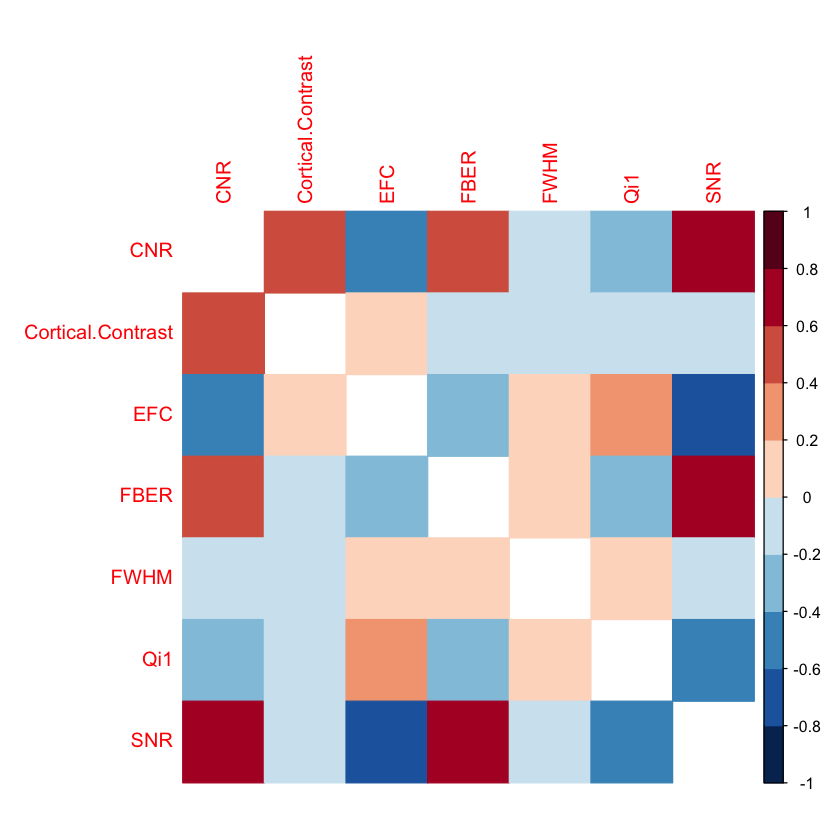

In [22]:
cols <- rev(brewer.pal(10, "RdBu"))
corrplot(abide_anat, method="color", diag=F, outline=F, col=cols, cl.length=length(cols)+1)

## Load and tidy the QAP measures for CORR sMRI

In [ ]:
#' This calculates the collinearity between the different QC measures
#' 
#' We first load the abide and corr dataset
#' then we compute the correlation between the measures within each site
#' we average across sites after doing an r->t->z (this is the difference with the other script)
#' and finally we plot that difference
#' 
#+ setup

In [ ]:
# plots
label_strings=c(CNR='CNR',
                Cortical.Contrast='Cortical Contrast',
                EFC='EFC',
                FBER='FBER',
                FWHM='Smoothness (FWHM)',
                Qi1='Fraction of Artifact Voxels',
                SNR='SNR')